# Task 1.3.3 - Gradient Descent for Temperatures

## Table of Contents

#### 1. Importing Libraries and Data
- Scaled dataset from previous task

#### 2. Data Wrangling

#### 3. Temperature Variation Whisker Plot

#### 4. Choosing a Weather Station and Year
- Current version: Munich, Stockholm and Rome 1960

#### 5. Gradient Descent Optimization
- Tweaking parameters
- Loss Function
- Loss Profile

#### 6. Weather Stations Comparisons

## 1. Importing Libraries and Data

In [1]:
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import os
from mpl_toolkits import mplot3d

from plotly.offline import download_plotlyjs, init_notebook_mode
from plotly.offline import plot, iplot
import plotly.graph_objects as go

In [2]:
# Create a path to where the data is stored

path = r'/Users/giadairene/Documents/CareerFoundry Data Analytics/Machine Learning with Python/ClimateWins/02 Data'

In [3]:
# Import scaled dataset

climate = pd.read_csv(os.path.join(path, 'dataset_scaled.csv'))
climate

DATE  MONTH  BASEL_cloud_cover  BASEL_wind_speed  BASEL_humidity  \
0      19600101      1           0.660514          -0.02793        0.826097   
1      19600102      1           0.244897          -0.02793        0.735760   
2      19600103      1           1.076130          -0.02793        1.277781   
3      19600104      1          -1.001953          -0.02793        1.458455   
4      19600105      1           0.244897          -0.02793        1.729466   
...         ...    ...                ...               ...             ...   
22945  20221027     10          -1.833187          -0.02793        0.284075   
22946  20221028     10           0.244897          -0.02793        0.103401   
22947  20221029     10          -0.586336          -0.02793        0.013064   
22948  20221030     10          -0.170720          -0.02793        0.374412   
22949  20221031     10          -0.170720          -0.02793        0.735760   

       BASEL_pressure  BASEL_global_radiation  BASEL_precipitation  \
0           -0.001949               -1.101066            -0.265148   
1           -0.001949               -1.058108             1.658760   
2           -0.001949               -1.251420             0.155707   
3           -0.001949               -0.821838            -0.445514   
4           -0.001949               -0.746661            -0.164944   
...               ...                     ...                  ...   
22945        1.037367               -0.005632            -0.004619   
22946        0.976231               -0.005632            -0.004619   
22947        0.716402               -0.005632            -0.004619   
22948        0.487141               -0.005632            -0.004619   
22949        0.196744               -0.005632            -0.004619   

       BASEL_snow_depth  BASEL_sunshine  ...  VALENTIA_cloud_cover  \
0             -0.179228       -0.902918  ...             -0.443701   
1             -0.179228       -0.810126  ...              0.783085   
2             -0.179228       -1.065304  ...              0.783085   
3             -0.179228       -0.114186  ...              0.783085   
4             -0.179228        0.187388  ...             -1.670486   
...                 ...             ...  ...                   ...   
22945         -0.179228        0.720943  ...             -0.443701   
22946         -0.179228        0.187388  ...             -0.443701   
22947         -0.179228        0.349774  ...             -0.443701   
22948         -0.179228        0.280180  ...             -0.443701   
22949         -0.179228       -0.322968  ...             -0.443701   

       VALENTIA_humidity  VALENTIA_pressure  VALENTIA_global_radiation  \
0               0.761754          -1.299744                  -0.806427   
1               1.183580          -1.262455                  -1.042055   
2               1.183580          -0.432779                  -1.136306   
3               0.480538           0.387574                  -1.183432   
4              -0.363113           1.729970                  -0.794645   
...                  ...                ...                        ...   
22945          -0.081896          -0.003958                  -0.005290   
22946          -0.081896          -0.003958                  -0.005290   
22947          -0.081896          -0.003958                  -0.005290   
22948          -0.081896          -0.003958                  -0.005290   
22949          -0.081896          -0.003958                  -0.005290   

       VALENTIA_precipitation  VALENTIA_snow_depth  VALENTIA_sunshine  \
0                   -0.088407            -0.024706           0.372147   
1                    0.503361            -0.024706          -0.829285   
2                   -0.396127            -0.024706          -1.009500   
3                    0.669056            -0.024706          -1.039536   
4                   -0.490810            -0.024706           0.672505   
...                       ...                  ...   

In [4]:
# Import non-scaled dataset

no_scaled_df = pd.read_csv(os.path.join(path, 'Dataset-weather-prediction-dataset-processed.csv'))
no_scaled_df

DATE  MONTH  BASEL_cloud_cover  BASEL_wind_speed  BASEL_humidity  \
0      19600101      1                  7               2.1            0.85   
1      19600102      1                  6               2.1            0.84   
2      19600103      1                  8               2.1            0.90   
3      19600104      1                  3               2.1            0.92   
4      19600105      1                  6               2.1            0.95   
...         ...    ...                ...               ...             ...   
22945  20221027     10                  1               2.1            0.79   
22946  20221028     10                  6               2.1            0.77   
22947  20221029     10                  4               2.1            0.76   
22948  20221030     10                  5               2.1            0.80   
22949  20221031     10                  5               2.1            0.84   

       BASEL_pressure  BASEL_global_radiation  BASEL_precipitation  \
0              1.0180                    0.32                 0.09   
1              1.0180                    0.36                 1.05   
2              1.0180                    0.18                 0.30   
3              1.0180                    0.58                 0.00   
4              1.0180                    0.65                 0.14   
...               ...                     ...                  ...   
22945          1.0248                    1.34                 0.22   
22946          1.0244                    1.34                 0.22   
22947          1.0227                    1.34                 0.22   
22948          1.0212                    1.34                 0.22   
22949          1.0193                    1.34                 0.22   

       BASEL_snow_depth  BASEL_sunshine  ...  VALENTIA_cloud_cover  \
0                     0             0.7  ...                     5   
1                     0             1.1  ...                     7   
2                     0             0.0  ...                     7   
3                     0             4.1  ...                     7   
4                     0             5.4  ...                     3   
...                 ...             ...  ...                   ...   
22945                 0             7.7  ...                     5   
22946                 0             5.4  ...                     5   
22947                 0             6.1  ...                     5   
22948                 0             5.8  ...                     5   
22949                 0             3.2  ...                     5   

       VALENTIA_humidity  VALENTIA_pressure  VALENTIA_global_radiation  \
0                   0.88             1.0003                       0.45   
1                   0.91             1.0007                       0.25   
2                   0.91             1.0096                       0.17   
3                   0.86             1.0184                       0.13   
4                   0.80             1.0328                       0.46   
...                  ...                ...                        ...   
22945               0.82             1.0142                       1.13   
22946               0.82             1.0142                       1.13   
22947               0.82             1.0142                       1.13   
22948               0.82             1.0142                       1.13   
22949               0.82             1.0142                       1.13   

       VALENTIA_precipitation  VALENTIA_snow_depth  VALENTIA_sunshine  \
0                        0.34                    0                4.7   
1                        0.84                    0                0.7   
2                        0.08                    0                0.1   
3                        0.98                    0                0.0   
4                        0.00                    0                5.7   
...                       ...                  ...   

## 2. Data Wrangling

In [5]:
# Reduce to just the mean temperatures

df = climate[['DATE', 'MONTH','BASEL_temp_mean',
 'BELGRADE_temp_mean',
 'BUDAPEST_temp_mean',
 'DEBILT_temp_mean',
 'DUSSELDORF_temp_mean',
 'GDANSK_temp_mean',
 'HEATHROW_temp_mean',
 'KASSEL_temp_mean',
 'LJUBLJANA_temp_mean',
 'MAASTRICHT_temp_mean',
 'MADRID_temp_mean',
 'MUNCHENB_temp_mean',
 'OSLO_temp_mean',
 'ROMA_temp_mean',
 'SONNBLICK_temp_mean',
 'STOCKHOLM_temp_mean',
 'TOURS_temp_mean',
 'VALENTIA_temp_mean']].copy()

In [6]:
df

DATE  MONTH  BASEL_temp_mean  BELGRADE_temp_mean  \
0      19600101      1        -0.528623           -1.016876   
1      19600102      1        -0.582946           -1.107669   
2      19600103      1        -0.257010           -1.084971   
3      19600104      1        -0.555784           -1.209812   
4      19600105      1        -1.003946           -1.209812   
...         ...    ...              ...                 ...   
22945  20221027     10         0.747959            0.628750   
22946  20221028     10         0.856604            0.367720   
22947  20221029     10         0.856604            0.083991   
22948  20221030     10         0.680055            0.265577   
22949  20221031     10         0.422023            0.197483   

       BUDAPEST_temp_mean  DEBILT_temp_mean  DUSSELDORF_temp_mean  \
0               -1.099163         -0.114356             -0.105836   
1               -1.110927         -0.367511             -0.370915   
2               -1.063873         -0.509912             -0.532908   
3               -1.146217         -0.525734             -0.577088   
4               -1.087400         -0.320045             -0.444548   
...                   ...               ...                   ...   
22945           -0.005167          0.898267              1.042841   
22946           -0.005167          0.945734              1.278467   
22947           -0.005167          0.914089              1.101748   
22948           -0.005167          0.692578              0.880848   
22949           -0.005167          0.439422              0.659949   

       GDANSK_temp_mean  HEATHROW_temp_mean  KASSEL_temp_mean  \
0             -0.927601           -0.106469         -0.182904   
1             -0.825294           -0.892676         -0.212437   
2             -0.940389           -0.490837         -0.389635   
3             -1.042696           -0.316124         -0.493001   
4             -0.978754           -0.403481         -0.552067   
...                 ...                 ...               ...   
22945          0.440753            0.906865         -0.005705   
22946          0.466330            0.802037         -0.005705   
22947          0.786039            0.924336         -0.005705   
22948          0.376811            0.697210         -0.005705   
22949          0.159409            0.435140         -0.005705   

       LJUBLJANA_temp_mean  MAASTRICHT_temp_mean  MADRID_temp_mean  \
0                -1.370824             -0.097084         -0.988280   
1                -1.043881             -0.232112         -0.691740   
2                -0.741156             -0.487164         -0.853490   
3                -0.910682             -0.472161         -0.624345   
4                -0.862246             -0.307127         -0.381721   
...                    ...                   ...               ...   
22945             0.481853              1.268193          0.683127   
22946             0.263891              1.313202          0.561815   
22947             0.300218              1.208181          0.548336   
22948             0.397090              0.923123          0.103526   
22949             0.348654              0.773092         -0.112140   

       MUNCHENB_temp_mean  OSLO_temp_mean  ROMA_temp_mean  \
0               -0.265742       -0.186575       -1.280450   
1               -0.353714       -0.368598       -0.539569   
2               -0.403983       -0.550620       -0.876333   
3               -0.642763       -0.417137       -0.775304   
4               -0.906678       -0.332193       -0.926848   
...                   ...             ...             ...   
22945            0.664244        0.395898       -0.000746   
22946            0.890456        0.541516       -0.000746   
22947            1.053832        0.395898       -0.000746   
22948            0.689378       -0.065226       -0.000746   
22949            0.488300        0.335224       -0.000746   

       SONNBLICK_temp_mean  STOCKHOLM_temp_mean  TOURS_temp_mean  \
0 

In [7]:
# Drop the DATE and MONTH data as those numbers are not scaled with the rest

notemp = df.drop(['DATE','MONTH'], axis=1)

In [8]:
# Reduce non-scaled df to just the mean temperatures as well

temp = no_scaled_df[['DATE', 'MONTH','BASEL_temp_mean',
 'BELGRADE_temp_mean',
 'BUDAPEST_temp_mean',
 'DEBILT_temp_mean',
 'DUSSELDORF_temp_mean',
 'GDANSK_temp_mean',
 'HEATHROW_temp_mean',
 'KASSEL_temp_mean',
 'LJUBLJANA_temp_mean',
 'MAASTRICHT_temp_mean',
 'MADRID_temp_mean',
 'MUNCHENB_temp_mean',
 'OSLO_temp_mean',
 'ROMA_temp_mean',
 'SONNBLICK_temp_mean',
 'STOCKHOLM_temp_mean',
 'TOURS_temp_mean',
 'VALENTIA_temp_mean']].copy()

In [9]:
temp

DATE  MONTH  BASEL_temp_mean  BELGRADE_temp_mean  \
0      19600101      1              6.5                 3.7   
1      19600102      1              6.1                 2.9   
2      19600103      1              8.5                 3.1   
3      19600104      1              6.3                 2.0   
4      19600105      1              3.0                 2.0   
...         ...    ...              ...                 ...   
22945  20221027     10             15.9                18.2   
22946  20221028     10             16.7                15.9   
22947  20221029     10             16.7                13.4   
22948  20221030     10             15.4                15.0   
22949  20221031     10             13.5                14.4   

       BUDAPEST_temp_mean  DEBILT_temp_mean  DUSSELDORF_temp_mean  \
0                     2.4               9.3                  10.0   
1                     2.3               7.7                   8.2   
2                     2.7               6.8                   7.1   
3                     2.0               6.7                   6.8   
4                     2.5               8.0                   7.7   
...                   ...               ...                   ...   
22945                11.7              15.7                  17.8   
22946                11.7              16.0                  19.4   
22947                11.7              15.8                  18.2   
22948                11.7              14.4                  16.7   
22949                11.7              12.8                  15.2   

       GDANSK_temp_mean  HEATHROW_temp_mean  KASSEL_temp_mean  \
0                   0.8                10.6               7.9   
1                   1.6                 6.1               7.7   
2                   0.7                 8.4               6.5   
3                  -0.1                 9.4               5.8   
4                   0.4                 8.9               5.4   
...                 ...                 ...               ...   
22945              11.5                16.4               9.1   
22946              11.7                15.8               9.1   
22947              14.2                16.5               9.1   
22948              11.0                15.2               9.1   
22949               9.3                13.7               9.1   

       LJUBLJANA_temp_mean  MAASTRICHT_temp_mean  MADRID_temp_mean  \
0                     -0.6                   9.5               7.6   
1                      2.1                   8.6               9.8   
2                      4.6                   6.9               8.6   
3                      3.2                   7.0              10.3   
4                      3.6                   8.1              12.1   
...                    ...                   ...               ...   
22945                 14.7                  18.6              20.0   
22946                 12.9                  18.9              19.1   
22947                 13.2                  18.2              19.0   
22948                 14.0                  16.3              15.7   
22949                 13.6                  15.3              14.1   

       MUNCHENB_temp_mean  OSLO_temp_mean  ROMA_temp_mean  \
0                     6.9             4.9             7.8   
1                     6.2             3.4            12.2   
2                     5.8             1.9            10.2   
3                     3.9             3.0            10.8   
4                     1.8             3.7             9.9   
...                   ...             ...             ...   
22945                14.3             9.7            15.4   
22946                16.1            10.9            15.4   
22947                17.4             9.7            15.4   
22948                14.5             5.9            15.4   
22949                12.9             9.2            15.4   

       SONNBLICK_temp_mean  STOCKHOLM_temp_mean  TOURS_temp_mean  \
0 

## 3. Temperature Variation Whisker Plot

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18]),
 [Text(1, 0, 'BASEL_temp_mean'),
  Text(2, 0, 'BELGRADE_temp_mean'),
  Text(3, 0, 'BUDAPEST_temp_mean'),
  Text(4, 0, 'DEBILT_temp_mean'),
  Text(5, 0, 'DUSSELDORF_temp_mean'),
  Text(6, 0, 'GDANSK_temp_mean'),
  Text(7, 0, 'HEATHROW_temp_mean'),
  Text(8, 0, 'KASSEL_temp_mean'),
  Text(9, 0, 'LJUBLJANA_temp_mean'),
  Text(10, 0, 'MAASTRICHT_temp_mean'),
  Text(11, 0, 'MADRID_temp_mean'),
  Text(12, 0, 'MUNCHENB_temp_mean'),
  Text(13, 0, 'OSLO_temp_mean'),
  Text(14, 0, 'ROMA_temp_mean'),
  Text(15, 0, 'SONNBLICK_temp_mean'),
  Text(16, 0, 'STOCKHOLM_temp_mean'),
  Text(17, 0, 'TOURS_temp_mean'),
  Text(18, 0, 'VALENTIA_temp_mean')])

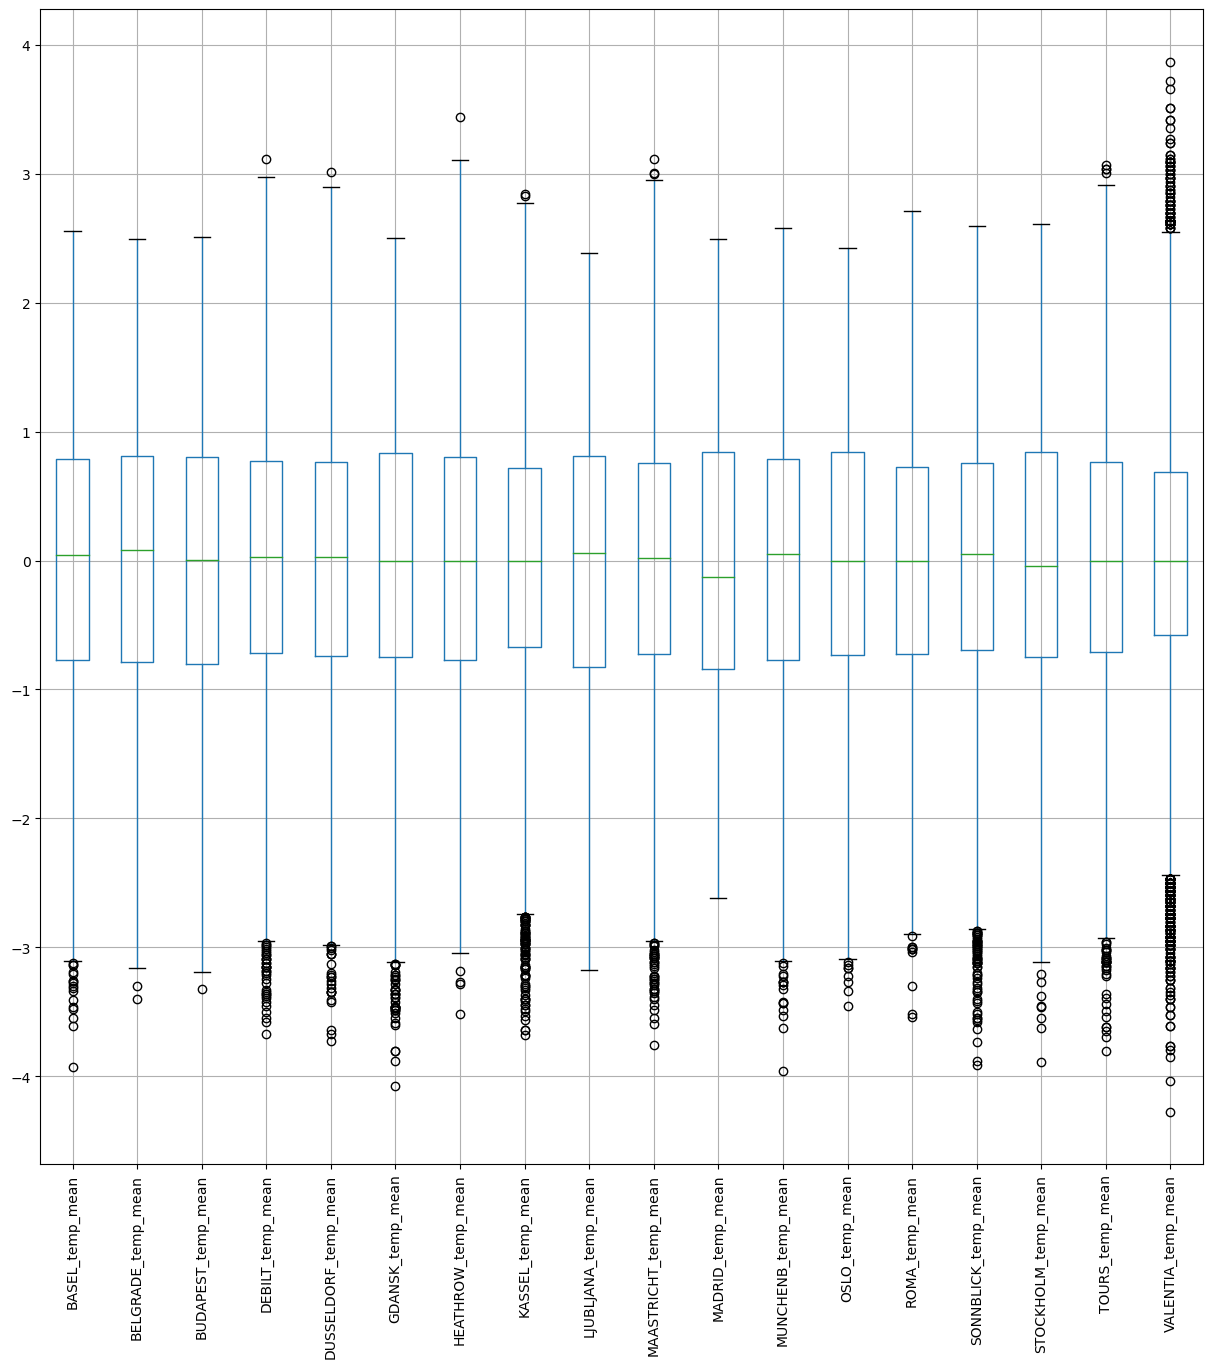

In [10]:
# Look at a whisker plot of the data to see variations in temperature

notemp.boxplot(figsize=(15,15))
plt.xticks(rotation=90)

## 4. Choosing a Weather Station and Year

In [11]:
# Reduce the dataset to a single year

dfyear = df[df['DATE'].astype(str).str[:4] == '1960']
dfyear

DATE  MONTH  BASEL_temp_mean  BELGRADE_temp_mean  BUDAPEST_temp_mean  \
0    19600101      1        -0.528623           -1.016876           -1.099163   
1    19600102      1        -0.582946           -1.107669           -1.110927   
2    19600103      1        -0.257010           -1.084971           -1.063873   
3    19600104      1        -0.555784           -1.209812           -1.146217   
4    19600105      1        -1.003946           -1.209812           -1.087400   
..        ...    ...              ...                 ...                 ...   
361  19601227     12        -1.289140           -1.277907           -1.440302   
362  19601228     12        -1.289140           -1.255208           -1.416775   
363  19601229     12        -1.207656           -1.221161           -1.122690   
364  19601230     12        -1.547172           -1.243859           -1.169744   
365  19601231     12        -1.139752           -1.107669           -1.216797   

     DEBILT_temp_mean  DUSSELDORF_temp_mean  GDANSK_temp_mean  \
0           -0.114356             -0.105836         -0.927601   
1           -0.367511             -0.370915         -0.825294   
2           -0.509912             -0.532908         -0.940389   
3           -0.525734             -0.577088         -1.042696   
4           -0.320045             -0.444548         -0.978754   
..                ...                   ...               ...   
361         -1.126979             -0.974707         -0.940389   
362         -1.522534             -1.283966         -0.978754   
363         -1.570001             -1.313420         -1.234521   
364         -1.316845             -1.372326         -0.889236   
365         -1.032045             -1.048340         -1.145003   

     HEATHROW_temp_mean  KASSEL_temp_mean  LJUBLJANA_temp_mean  \
0             -0.106469         -0.182904            -1.370824   
1             -0.892676         -0.212437            -1.043881   
2             -0.490837         -0.389635            -0.741156   
3             -0.316124         -0.493001            -0.910682   
4             -0.403481         -0.552067            -0.862246   
..                  ...               ...                  ...   
361           -1.469228         -0.891697            -1.721985   
362           -1.469228         -1.054129            -1.479805   
363           -1.434286         -1.305160            -1.443478   
364           -1.084860         -1.393759            -1.273952   
365           -1.137274         -1.172261            -1.286061   

     MAASTRICHT_temp_mean  MADRID_temp_mean  MUNCHENB_temp_mean  \
0               -0.097084         -0.988280           -0.265742   
1               -0.232112         -0.691740           -0.353714   
2               -0.487164         -0.853490           -0.403983   
3               -0.472161         -0.624345           -0.642763   
4               -0.307127         -0.381721           -0.906678   
..                    ...               ...                 ...   
361             -0.997267         -1.069155           -1.120324   
362             -1.342338         -1.338737           -1.321402   
363             -1.342338         -0.920885           -1.459643   
364             -1.177304         -0.772615           -1.547614   
365             -0.937255         -1.136550           -1.195728   

     OSLO_temp_mean  ROMA_temp_mean  SONNBLICK_temp_mean  STOCKHOLM_temp_mean  \
0         -0.186575       -1.280450            -0.124331            -0.391072   
1         -0.368598       -0.539569            -0.650834            -0.415953   
2         -0.550620       -0.876333            -0.650834            -0.615003   
3         -0.417137       -0.775304            -0.943336            -0.764290   
4         -0.332193       -0.926848            -0.621584            -0.503037   
..              ...             ...                  ...                  ...   
361       -0.417137       -1.785596            -0.914086            -0.403513   
362      

In [12]:
dfyear.describe()

DATE       MONTH  BASEL_temp_mean  BELGRADE_temp_mean  \
count  3.660000e+02  366.000000       366.000000          366.000000   
mean   1.960067e+07    6.513661        -0.102317           -0.032384   
std    3.457653e+02    3.455958         0.935826            0.920271   
min    1.960010e+07    1.000000        -3.190431           -2.401472   
25%    1.960040e+07    4.000000        -0.756099           -0.594120   
50%    1.960070e+07    7.000000        -0.053300            0.055618   
75%    1.960098e+07    9.750000         0.649499            0.662798   
max    1.960123e+07   12.000000         1.820830            1.843109   

       BUDAPEST_temp_mean  DEBILT_temp_mean  DUSSELDORF_temp_mean  \
count          366.000000        366.000000            366.000000   
mean            -0.063919         -0.052666             -0.034416   
std              0.946637          0.910451              0.919531   
min             -2.416664         -2.645913             -2.874442   
25%             -0.675681         -0.668134             -0.661766   
50%             -0.005167         -0.011511             -0.002750   
75%              0.744750          0.692578              0.715174   
max              1.806397          1.847601              1.970619   

       GDANSK_temp_mean  HEATHROW_temp_mean  KASSEL_temp_mean  \
count        366.000000          366.000000        366.000000   
mean          -0.067706           -0.103366          0.026208   
std            0.978767            0.919195          0.964448   
min           -2.922584           -2.307849         -3.446307   
25%           -0.825294           -0.840262         -0.666507   
50%           -0.096358           -0.071526          0.082894   
75%            0.757265            0.714681          0.802762   
max            1.834684            1.745486          2.002543   

       LJUBLJANA_temp_mean  MAASTRICHT_temp_mean  MADRID_temp_mean  \
count           366.000000            366.000000        366.000000   
mean             -0.074499             -0.063840         -0.130480   
std               0.906193              0.902235          0.979590   
min              -2.714923             -3.247725         -2.322710   
25%              -0.738129             -0.712209         -0.890557   
50%              -0.002507              0.052946         -0.294107   
75%               0.699815              0.649317          0.787590   
max               1.668536              1.688278          1.936682   

       MUNCHENB_temp_mean  OSLO_temp_mean  ROMA_temp_mean  \
count          366.000000      366.000000      366.000000   
mean            -0.101680       -0.078422        0.092554   
std              0.938523        0.998018        1.002362   
min             -3.017997       -2.249500       -2.408610   
25%             -0.777863       -0.738711       -0.653227   
50%             -0.001827       -0.168373       -0.009165   
75%              0.626541        0.869157        1.110576   
max              1.858144        1.985564        1.952486   

       SONNBLICK_temp_mean  STOCKHOLM_temp_mean  TOURS_temp_mean  \
count           366.000000           366.000000       366.000000   
mean             -0.175958            -0.092804        -0.059940   
std               0.884235             0.988702         0.944029   
min              -3.502727            -2.356684        -3.112470   
25%              -0.764178            -0.798501        -0.692653   
50%              -0.124331            -0.179582         0.032900   
75%               0.475298             0.877867         0.683937   
max               1.967058             1.686504         1.938947   

       VALENTIA_temp_mean  
count          366.000000  
mean            -0.057276  
std              1.127911  
min             -2.951420  
25%             -0.848468  
50%             -0.037330  
75%              0.893978  
max              2.606381

In [13]:
# Drop the DATE and MONTH data from the dfyear

notempyear = dfyear.drop(['DATE','MONTH'], axis=1)

In [14]:
# Plot temperature data for all stations for 2020
# X = weather station
# Y = day of the year
# Z = temperature

fig = go.Figure(data=[go.Surface(z=notempyear.values)])
fig.update_layout(title='Yearly temperatures in Europe (1960)', autosize=False,
                  width=600, height=600)
fig.show()

In [15]:
# Create a set of data from 1 to 366 (inclusive) as 1960 is a leap year
# We'll scale this by 100 as the index is made. This will help the gradient descent converge 366 = 3.66

i = np.arange(0.01,3.67,0.01) # 3.67 to ensure it includes up to 3.66 with 0.01 steps
index = pd.DataFrame(data = i, columns = ['index'])
index

index
0     0.01
1     0.02
2     0.03
3     0.04
4     0.05
..     ...
361   3.62
362   3.63
363   3.64
364   3.65
365   3.66

[366 rows x 1 columns]

In [16]:
n_rows = dfyear.shape[0]
n_rows

366

### We need to ensure that index is of the same length as dfyear (n_rows).

In [17]:
# This will translate the chosen weather data into the X and y datasets needed for the optimization function.

X=index.to_numpy().reshape(n_rows,1)

# Represent x_0 as a vector of 1s for vector computation

ones = np.ones((n_rows,1))
X = np.concatenate((ones, X), axis=1)
y=dfyear['MUNCHENB_temp_mean'].to_numpy().reshape(n_rows,1) #<----INSERT WEATHER STATION HERE

In [18]:
X.shape, y.shape

((366, 2), (366, 1))

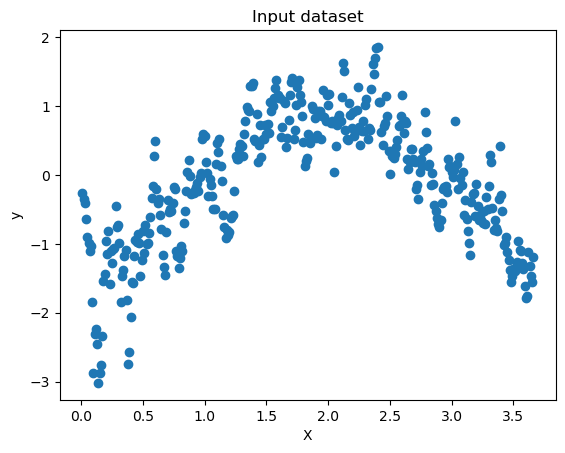

In [19]:
# Look at one year of temperature data over time

plt.scatter(x=index['index'], y=dfyear['MUNCHENB_temp_mean']) #<----INSERT WEATHER STATION HERE
plt.xlabel('X'); plt.ylabel('y');
plt.title('Input dataset');
plt.show()

In [20]:
# What is the min temperature? (Note gradient descent is not actually finding this number)

dfyear['MUNCHENB_temp_mean'].min()

-3.0179973340644315

In [21]:
# What is the max temperature? (Note gradient descent is not actually finding this number)

dfyear['MUNCHENB_temp_mean'].max()

1.8581441649783847

## 5. Gradient Descent Optimization
- Tweaking parameters
- Loss Function
- Loss Profile

In [22]:
# This computes the loss function for the gradiant descent. DO NOT CHANGE!

def compute_cost(X, y, theta=np.array([[0],[0]])):
    """Given covariate matrix X, the prediction results y and coefficients theta
    compute the loss"""
    
    m = len(y)
    J=0 # initialize loss to zero
    
    # reshape theta
    theta=theta.reshape(2,1)
    
    # calculate the hypothesis - y_hat
    h_x = np.dot(X,theta)
    #print(h_x)
    
    # subtract y from y_hat, square and sum
    error_term = sum((h_x - y)**2)
    
    # divide by twice the number of samples - standard practice.
    loss = error_term/(2*m)
    
    return loss

In [23]:
compute_cost(X,y)

array([0.44437913])

In [24]:
# This is the gradiant descent function. DO NOT CHANGE!

def gradient_descent(X, y, theta=np.array([[0],[0]]),
                    alpha=0.01, num_iterations=1500):
    """
    Solve for theta using Gradient Descent optimiztion technique. 
    Alpha is the learning rate
    """
    m = len(y)
    J_history = []
    theta0_history = []
    theta1_history = []
    theta = theta.reshape(2,1)
    
    for i in range(num_iterations):
        error = (np.dot(X, theta) - y)
        
        term0 = (alpha/m) * sum(error* X[:,0].reshape(m,1))
        term1 = (alpha/m) * sum(error* X[:,1].reshape(m,1))
        
        # update theta
        term_vector = np.array([[term0],[term1]])
        #print(term_vector)
        theta = theta - term_vector.reshape(2,1)
        
        # store history values
        theta0_history.append(theta[0].tolist()[0])
        theta1_history.append(theta[1].tolist()[0])
        J_history.append(compute_cost(X,y,theta).tolist()[0])
        
    return (theta, J_history, theta0_history, theta1_history)

### Next: adjust theta0, theta1, number of iterations, and step size to get different results. Goal is to find bottom of the curve as quickly as possible/reduce loss to 0.

In [25]:
%%time
#This runs your data through a gradiant descent for the starting conditions in 'theta_init.'
#You will need to adjust these numbers

num_iterations=300 # Decide how many iterations you need. Start small and work up. Over 10,000 iterations will take a few seconds.
theta_init=np.array([[0.5],[0.5]])#<---this is where you put the guess for [theta0], [theta1]. Start with 1 and 1.
alpha=0.01 #<---Decide what your step size is. Try values between 0.1 and 0.00001. You will need to adjust your iterations.
#If your solution is not converging, try a smaller step size.
theta, J_history, theta0_history, theta1_history = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

CPU times: user 292 ms, sys: 7.78 ms, total: 300 ms
Wall time: 352 ms


In [26]:
theta

array([[-0.08810217],
       [ 0.03517743]])

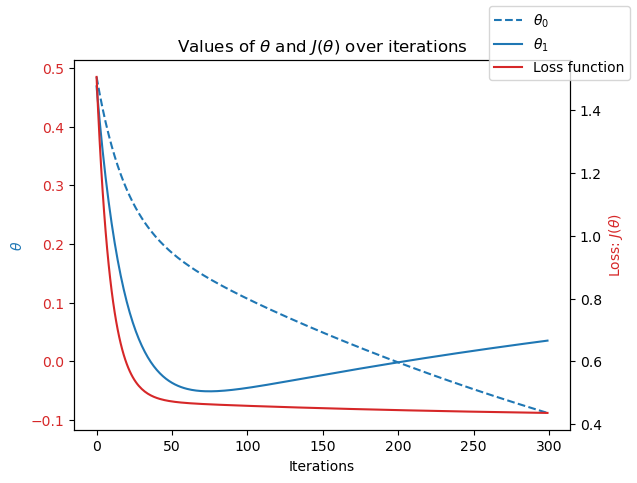

In [27]:
#This will plot your loss, theta0, and theta1. If the result looks like a straight line, it's not converging on an answer!
#Your loss (red) should be trending toward 0.

fig, ax1 = plt.subplots()

# plot thetas over time
color='tab:blue'
ax1.plot(theta0_history, label='$\\theta_{0}$', linestyle='--', color=color)
ax1.plot(theta1_history, label='$\\theta_{1}$', linestyle='-', color=color)
# ax1.legend()
ax1.set_xlabel('Iterations'); ax1.set_ylabel('$\\theta$', color=color);
ax1.tick_params(axis='y', labelcolor=color)

# plot loss function over time
color='tab:red'
ax2 = ax1.twinx()
ax2.plot(J_history, label='Loss function', color=color)
ax2.set_title('Values of $\\theta$ and $J(\\theta)$ over iterations')
ax2.set_ylabel('Loss: $J(\\theta)$', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# ax2.legend()
fig.legend()

plt.show()

In [28]:
%%time
# theta range
theta0_vals = np.linspace(-10,10,100) # Look in the chart above for the limits of where theta0 and theta1 appear.
theta1_vals = np.linspace(-10,10,100) # Put those values as the first two "linspace" numbers in these lines
                                      # Select with large margins, maybe +/- 10
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# compute cost for each combination of theta
c1=0; c2=0
for i in theta0_vals:
    for j in theta1_vals:
        t = np.array([i, j])
        J_vals[c1][c2] = compute_cost(X, y, t.transpose()).tolist()[0]
        c2=c2+1
    c1=c1+1
    c2=0 # reinitialize to 0

CPU times: user 4.04 s, sys: 83.2 ms, total: 4.12 s
Wall time: 6.01 s


In [29]:
# This figure shows the loss function.

# X = Theta0
# Y - Theta1
# Z = Loss
# Find where it is closest to 0 in X and Y!

# you can click/hold in the graph below to rotate!

fig = go.Figure(data=[go.Surface(x=theta1_vals, y=theta0_vals, z=J_vals)])
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

In [30]:
# Here is the same figure as above, with the line the loss function takes toward the minimum.

# X = Theta0
# Y - Theta1
# Z = Loss
# black line = path of loss function over the iterations.
# Find where it is closest to 0 in X and Y!

# you can click/hold in the graph below to rotate!

line_marker = dict(color='#101010', width=2)
fig = go.Figure()
fig.add_surface(x=theta1_vals, y=theta0_vals, z=J_vals)
fig.add_scatter3d(x=theta1_history, y=theta0_history, z=J_history, line=line_marker, name='')
#The below line adds a graph of just the loss over iterations in a 2D plane
plt.plot(theta0_history, theta1_history, 'r+');
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

In [31]:
# Rerun the optimization above, but this time start closer to the objective!
# Find where the black line ends near the lowest X/Y/Z coordinate and make that your guess below.

num_iterations=500 #<---start with the same iterations as above
theta_init=np.array([[0],[0.2]]) #<---make a guess as to a more accurate [x],[y] coordinates near the minimum in the graph above.
alpha= 0.01 #<---start with the same step size as above
theta1, J_history1, theta0_history1, theta1_history1 = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

In [32]:
#Let's look at the new loss path on the function. It should start much closer to the goal

line_marker = dict(color='#101010', width=2)
fig = go.Figure()
fig.add_surface(x=theta1_vals, y=theta0_vals, z=J_vals)
fig.add_scatter3d(x=theta1_history1, y=theta0_history1, z=J_history1, line=line_marker, name='')
#The below line adds a graph of just the loss over iterations in a 2D plane
plt.plot(theta0_history1, theta1_history1, 'r+');
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

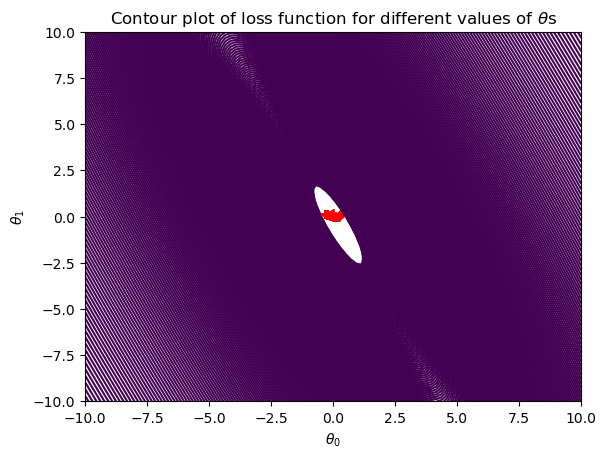

In [33]:
#This plot shows the convergence similar to above, but only in the X/Y plane (there's no height)

plt.contour(theta0_vals, theta1_vals, J_vals, levels = np.logspace(0,10,1000))
plt.xlabel('$\\theta_{0}$'); plt.ylabel("$\\theta_{1}$")
plt.title("Contour plot of loss function for different values of $\\theta$s");
plt.plot(theta0_history1, theta1_history1, 'r+');

plt.show()

### Repeat the same process for the weather station of Stockholm in 1960.

In [34]:
# This will translate the chosen weather data into the X and y datasets needed for the optimization function.

X=index.to_numpy().reshape(n_rows,1)

# Represent x_0 as a vector of 1s for vector computation

ones = np.ones((n_rows,1))
X = np.concatenate((ones, X), axis=1)
y=dfyear['STOCKHOLM_temp_mean'].to_numpy().reshape(n_rows,1) #<----INSERT WEATHER STATION HERE

In [35]:
X.shape, y.shape

((366, 2), (366, 1))

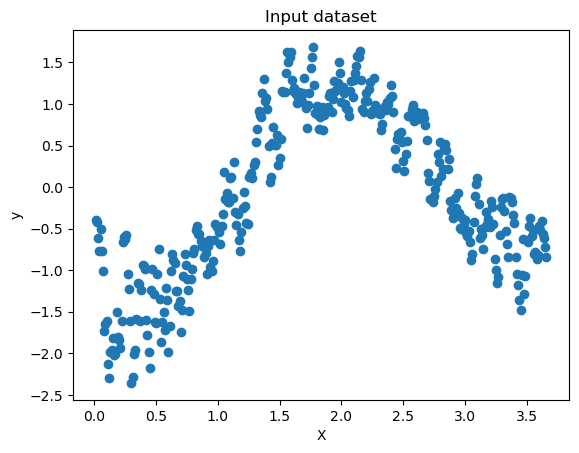

In [36]:
# Look at one year of temperature data over time

plt.scatter(x=index['index'], y=dfyear['STOCKHOLM_temp_mean']) #<----INSERT WEATHER STATION HERE
plt.xlabel('X'); plt.ylabel('y');
plt.title('Input dataset');
plt.show()

In [37]:
# This computes the loss function for the gradiant descent. DO NOT CHANGE!

def compute_cost(X, y, theta=np.array([[0],[0]])):
    """Given covariate matrix X, the prediction results y and coefficients theta
    compute the loss"""
    
    m = len(y)
    J=0 # initialize loss to zero
    
    # reshape theta
    theta=theta.reshape(2,1)
    
    # calculate the hypothesis - y_hat
    h_x = np.dot(X,theta)
    #print(h_x)
    
    # subtract y from y_hat, square and sum
    error_term = sum((h_x - y)**2)
    
    # divide by twice the number of samples - standard practice.
    loss = error_term/(2*m)
    
    return loss

In [38]:
compute_cost(X,y)

array([0.49173644])

In [39]:
# This is the gradiant descent function. DO NOT CHANGE!

def gradient_descent(X, y, theta=np.array([[0],[0]]),
                    alpha=0.01, num_iterations=1500):
    """
    Solve for theta using Gradient Descent optimiztion technique. 
    Alpha is the learning rate
    """
    m = len(y)
    J_history = []
    theta0_history = []
    theta1_history = []
    theta = theta.reshape(2,1)
    
    for i in range(num_iterations):
        error = (np.dot(X, theta) - y)
        
        term0 = (alpha/m) * sum(error* X[:,0].reshape(m,1))
        term1 = (alpha/m) * sum(error* X[:,1].reshape(m,1))
        
        # update theta
        term_vector = np.array([[term0],[term1]])
        #print(term_vector)
        theta = theta - term_vector.reshape(2,1)
        
        # store history values
        theta0_history.append(theta[0].tolist()[0])
        theta1_history.append(theta[1].tolist()[0])
        J_history.append(compute_cost(X,y,theta).tolist()[0])
        
    return (theta, J_history, theta0_history, theta1_history)

In [40]:
%%time
#This runs your data through a gradiant descent for the starting conditions in 'theta_init.'
#You will need to adjust these numbers

num_iterations=500 # Decide how many iterations you need. Start small and work up. Over 10,000 iterations will take a few seconds.
theta_init=np.array([[0.5],[0.5]]) #<---this is where you put the guess for [theta0], [theta1]. Start with 1 and 1.
alpha=0.01 #<---Decide what your step size is. Try values between 0.1 and 0.00001. You will need to adjust your iterations.
#If your solution is not converging, try a smaller step size.
theta, J_history, theta0_history, theta1_history = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

CPU times: user 758 ms, sys: 13.7 ms, total: 771 ms
Wall time: 1.02 s


In [41]:
theta

array([[-0.36046632],
       [ 0.18328372]])

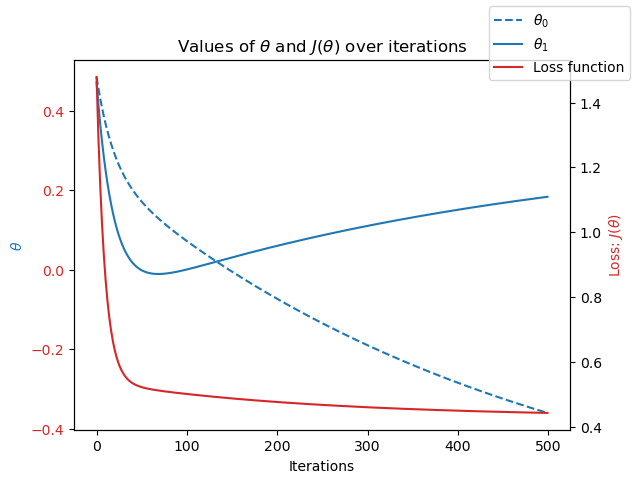

In [42]:
#This will plot your loss, theta0, and theta1. If the result looks like a straight line, it's not converging on an answer!
#Your loss (red) should be trending toward 0.

fig, ax1 = plt.subplots()

# plot thetas over time
color='tab:blue'
ax1.plot(theta0_history, label='$\\theta_{0}$', linestyle='--', color=color)
ax1.plot(theta1_history, label='$\\theta_{1}$', linestyle='-', color=color)
# ax1.legend()
ax1.set_xlabel('Iterations'); ax1.set_ylabel('$\\theta$', color=color);
ax1.tick_params(axis='y', labelcolor=color)

# plot loss function over time
color='tab:red'
ax2 = ax1.twinx()
ax2.plot(J_history, label='Loss function', color=color)
ax2.set_title('Values of $\\theta$ and $J(\\theta)$ over iterations')
ax2.set_ylabel('Loss: $J(\\theta)$', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# ax2.legend()
fig.legend()

plt.show()

In [43]:
%%time
# theta range
theta0_vals = np.linspace(-10,10,100) # Look in the chart above for the limits of where theta0 and theta1 appear.
theta1_vals = np.linspace(-10,10,100) # Put those values as the first two "linspace" numbers in these lines
                                      # Select with large margins, maybe +/- 10
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# compute cost for each combination of theta
c1=0; c2=0
for i in theta0_vals:
    for j in theta1_vals:
        t = np.array([i, j])
        J_vals[c1][c2] = compute_cost(X, y, t.transpose()).tolist()[0]
        c2=c2+1
    c1=c1+1
    c2=0 # reinitialize to 0

CPU times: user 3.32 s, sys: 44.8 ms, total: 3.36 s
Wall time: 4.37 s


In [44]:
# This figure shows the loss function.

# X = Theta0
# Y - Theta1
# Z = Loss
# Find where it is closest to 0 in X and Y!

# you can click/hold in the graph below to rotate!

fig = go.Figure(data=[go.Surface(x=theta1_vals, y=theta0_vals, z=J_vals)])
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

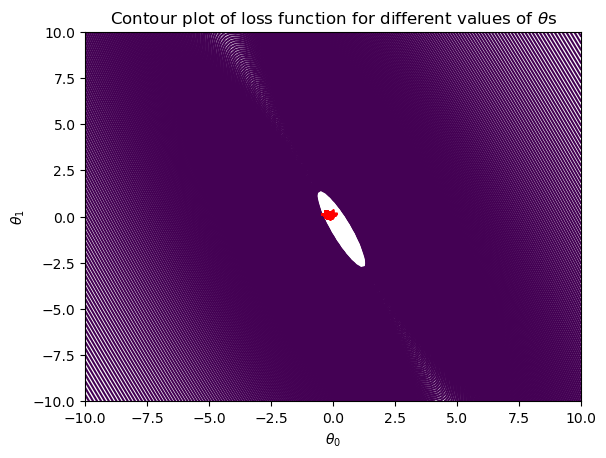

In [45]:
#This plot shows the convergence similar to above, but only in the X/Y plane (there's no height)

plt.contour(theta0_vals, theta1_vals, J_vals, levels = np.logspace(0,10,1000))
plt.xlabel('$\\theta_{0}$'); plt.ylabel("$\\theta_{1}$")
plt.title("Contour plot of loss function for different values of $\\theta$s");
plt.plot(theta0_history1, theta1_history1, 'r+');

plt.show()

### Repeat the same process for the weather station of Rome in 1960.

In [46]:
# This will translate the chosen weather data into the X and y datasets needed for the optimization function.

X=index.to_numpy().reshape(n_rows,1)

# Represent x_0 as a vector of 1s for vector computation

ones = np.ones((n_rows,1))
X = np.concatenate((ones, X), axis=1)
y=dfyear['ROMA_temp_mean'].to_numpy().reshape(n_rows,1) #<----INSERT WEATHER STATION HERE

In [47]:
X.shape, y.shape

((366, 2), (366, 1))

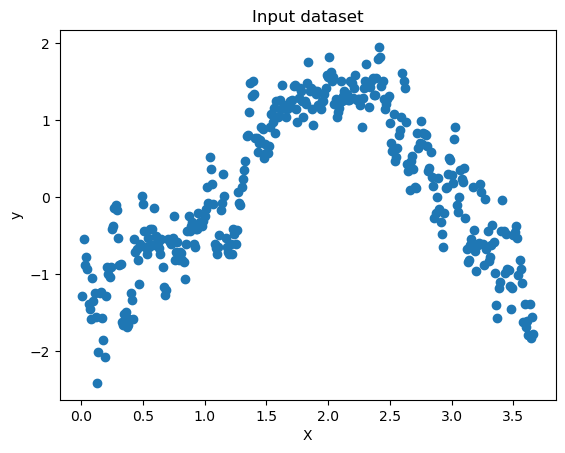

In [48]:
# Look at one year of temperature data over time

plt.scatter(x=index['index'], y=dfyear['ROMA_temp_mean']) #<----INSERT WEATHER STATION HERE
plt.xlabel('X'); plt.ylabel('y');
plt.title('Input dataset');
plt.show()

#### There seems to be no temperature variation in Rome in 2020 over the course of the year. This seems odd to me.

In [49]:
# This computes the loss function for the gradiant descent. DO NOT CHANGE!

def compute_cost(X, y, theta=np.array([[0],[0]])):
    """Given covariate matrix X, the prediction results y and coefficients theta
    compute the loss"""
    
    m = len(y)
    J=0 # initialize loss to zero
    
    # reshape theta
    theta=theta.reshape(2,1)
    
    # calculate the hypothesis - y_hat
    h_x = np.dot(X,theta)
    #print(h_x)
    
    # subtract y from y_hat, square and sum
    error_term = sum((h_x - y)**2)
    
    # divide by twice the number of samples - standard practice.
    loss = error_term/(2*m)
    
    return loss

In [50]:
compute_cost(X,y)

array([0.5052758])

In [51]:
# This is the gradiant descent function. DO NOT CHANGE!

def gradient_descent(X, y, theta=np.array([[0],[0]]),
                    alpha=0.01, num_iterations=1500):
    """
    Solve for theta using Gradient Descent optimiztion technique. 
    Alpha is the learning rate
    """
    m = len(y)
    J_history = []
    theta0_history = []
    theta1_history = []
    theta = theta.reshape(2,1)
    
    for i in range(num_iterations):
        error = (np.dot(X, theta) - y)
        
        term0 = (alpha/m) * sum(error* X[:,0].reshape(m,1))
        term1 = (alpha/m) * sum(error* X[:,1].reshape(m,1))
        
        # update theta
        term_vector = np.array([[term0],[term1]])
        #print(term_vector)
        theta = theta - term_vector.reshape(2,1)
        
        # store history values
        theta0_history.append(theta[0].tolist()[0])
        theta1_history.append(theta[1].tolist()[0])
        J_history.append(compute_cost(X,y,theta).tolist()[0])
        
    return (theta, J_history, theta0_history, theta1_history)

In [52]:
%%time
#This runs your data through a gradiant descent for the starting conditions in 'theta_init.'
#You will need to adjust these numbers

num_iterations=300 # Decide how many iterations you need. Start small and work up. Over 10,000 iterations will take a few seconds.
theta_init=np.array([[0.5],[0.5]]) #<---this is where you put the guess for [theta0], [theta1]. Start with 1 and 1.
alpha=0.01 #<---Decide what your step size is. Try values between 0.1 and 0.00001. You will need to adjust your iterations.
#If your solution is not converging, try a smaller step size.
theta, J_history, theta0_history, theta1_history = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

CPU times: user 244 ms, sys: 6.86 ms, total: 251 ms
Wall time: 252 ms


In [53]:
theta

array([[-0.00240796],
       [ 0.08739248]])

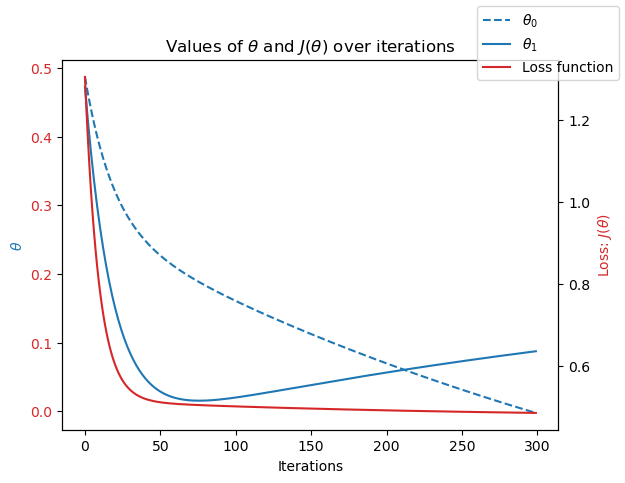

In [54]:
#This will plot your loss, theta0, and theta1. If the result looks like a straight line, it's not converging on an answer!
#Your loss (red) should be trending toward 0.

fig, ax1 = plt.subplots()

# plot thetas over time
color='tab:blue'
ax1.plot(theta0_history, label='$\\theta_{0}$', linestyle='--', color=color)
ax1.plot(theta1_history, label='$\\theta_{1}$', linestyle='-', color=color)
# ax1.legend()
ax1.set_xlabel('Iterations'); ax1.set_ylabel('$\\theta$', color=color);
ax1.tick_params(axis='y', labelcolor=color)

# plot loss function over time
color='tab:red'
ax2 = ax1.twinx()
ax2.plot(J_history, label='Loss function', color=color)
ax2.set_title('Values of $\\theta$ and $J(\\theta)$ over iterations')
ax2.set_ylabel('Loss: $J(\\theta)$', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# ax2.legend()
fig.legend()

plt.show()

In [55]:
%%time
# theta range
theta0_vals = np.linspace(-10,10,100) # Look in the chart above for the limits of where theta0 and theta1 appear.
theta1_vals = np.linspace(-10,10,100) # Put those values as the first two "linspace" numbers in these lines
                                      # Select with large margins, maybe +/- 10
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# compute cost for each combination of theta
c1=0; c2=0
for i in theta0_vals:
    for j in theta1_vals:
        t = np.array([i, j])
        J_vals[c1][c2] = compute_cost(X, y, t.transpose()).tolist()[0]
        c2=c2+1
    c1=c1+1
    c2=0 # reinitialize to 0

CPU times: user 2.77 s, sys: 27 ms, total: 2.8 s
Wall time: 2.83 s


In [56]:
# This figure shows the loss function.

# X = Theta0
# Y - Theta1
# Z = Loss
# Find where it is closest to 0 in X and Y!

# you can click/hold in the graph below to rotate!

fig = go.Figure(data=[go.Surface(x=theta1_vals, y=theta0_vals, z=J_vals)])
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

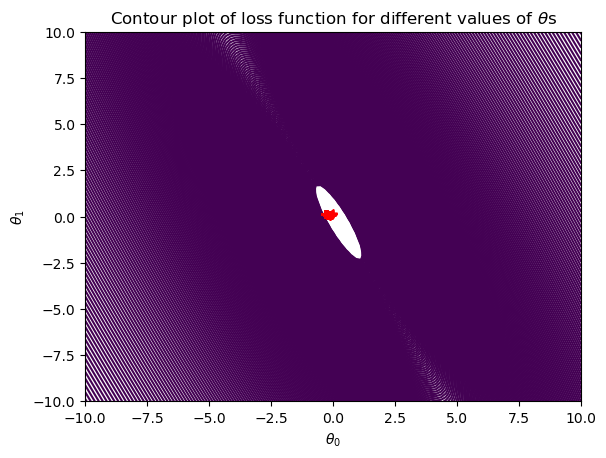

In [57]:
#This plot shows the convergence similar to above, but only in the X/Y plane (there's no height)

plt.contour(theta0_vals, theta1_vals, J_vals, levels = np.logspace(0,10,1000))
plt.xlabel('$\\theta_{0}$'); plt.ylabel("$\\theta_{1}$")
plt.title("Contour plot of loss function for different values of $\\theta$s");
plt.plot(theta0_history1, theta1_history1, 'r+');

plt.show()

## 6. Weather Stations Comparisons

In [58]:
# Check differences in temperature in 1960
# Reduce the dataset to a single year

df_1960 = temp[temp['DATE'].astype(str).str[:4] == '1960']
df_1960

DATE  MONTH  BASEL_temp_mean  BELGRADE_temp_mean  BUDAPEST_temp_mean  \
0    19600101      1              6.5                 3.7                 2.4   
1    19600102      1              6.1                 2.9                 2.3   
2    19600103      1              8.5                 3.1                 2.7   
3    19600104      1              6.3                 2.0                 2.0   
4    19600105      1              3.0                 2.0                 2.5   
..        ...    ...              ...                 ...                 ...   
361  19601227     12              0.9                 1.4                -0.5   
362  19601228     12              0.9                 1.6                -0.3   
363  19601229     12              1.5                 1.9                 2.2   
364  19601230     12             -1.0                 1.7                 1.8   
365  19601231     12              2.0                 2.9                 1.4   

     DEBILT_temp_mean  DUSSELDORF_temp_mean  GDANSK_temp_mean  \
0                 9.3                  10.0               0.8   
1                 7.7                   8.2               1.6   
2                 6.8                   7.1               0.7   
3                 6.7                   6.8              -0.1   
4                 8.0                   7.7               0.4   
..                ...                   ...               ...   
361               2.9                   4.1               0.7   
362               0.4                   2.0               0.4   
363               0.1                   1.8              -1.6   
364               1.7                   1.4               1.1   
365               3.5                   3.6              -0.9   

     HEATHROW_temp_mean  KASSEL_temp_mean  LJUBLJANA_temp_mean  \
0                  10.6               7.9                 -0.6   
1                   6.1               7.7                  2.1   
2                   8.4               6.5                  4.6   
3                   9.4               5.8                  3.2   
4                   8.9               5.4                  3.6   
..                  ...               ...                  ...   
361                 2.8               3.1                 -3.5   
362                 2.8               2.0                 -1.5   
363                 3.0               0.3                 -1.2   
364                 5.0              -0.3                  0.2   
365                 4.7               1.2                  0.1   

     MAASTRICHT_temp_mean  MADRID_temp_mean  MUNCHENB_temp_mean  \
0                     9.5               7.6                 6.9   
1                     8.6               9.8                 6.2   
2                     6.9               8.6                 5.8   
3                     7.0              10.3                 3.9   
4                     8.1              12.1                 1.8   
..                    ...               ...                 ...   
361                   3.5               7.0                 0.1   
362                   1.2               5.0                -1.5   
363                   1.2               8.1                -2.6   
364                   2.3               9.2                -3.3   
365                   3.9               6.5                -0.5   

     OSLO_temp_mean  ROMA_temp_mean  SONNBLICK_temp_mean  STOCKHOLM_temp_mean  \
0               4.9             7.8                 -5.9                  4.2   
1               3.4            12.2                 -9.5                  4.0   
2               1.9            10.2                 -9.5                  2.4   
3               3.0            10.8                -11.5                  1.2   
4               3.7             9.9                 -9.3                  3.3   
..              ...             ...                  ...                  ...   
361             3.0             4.8                -11.3                  4.1   
362      

In [59]:
# Select only specific weather stations (Munich, Stockholm, Rome)

stations_1960 = df_1960[['DATE', 'MONTH',
 'MUNCHENB_temp_mean',
 'ROMA_temp_mean',
 'STOCKHOLM_temp_mean']].copy()

In [60]:
stations_1960

DATE  MONTH  MUNCHENB_temp_mean  ROMA_temp_mean  STOCKHOLM_temp_mean
0    19600101      1                 6.9             7.8                  4.2
1    19600102      1                 6.2            12.2                  4.0
2    19600103      1                 5.8            10.2                  2.4
3    19600104      1                 3.9            10.8                  1.2
4    19600105      1                 1.8             9.9                  3.3
..        ...    ...                 ...             ...                  ...
361  19601227     12                 0.1             4.8                  4.1
362  19601228     12                -1.5             7.2                  2.8
363  19601229     12                -2.6             4.6                  2.4
364  19601230     12                -3.3             6.2                  1.5
365  19601231     12                -0.5             4.9                  0.6

[366 rows x 5 columns]

In [61]:
stations_1960.describe()

DATE       MONTH  MUNCHENB_temp_mean  ROMA_temp_mean  \
count  3.660000e+02  366.000000          366.000000      366.000000   
mean   1.960067e+07    6.513661            8.205464       15.954098   
std    3.457653e+02    3.455958            7.467935        5.952904   
min    1.960010e+07    1.000000          -15.000000        1.100000   
25%    1.960040e+07    4.000000            2.825000       11.525000   
50%    1.960070e+07    7.000000            9.000000       15.350000   
75%    1.960098e+07    9.750000           14.000000       22.000000   
max    1.960123e+07   12.000000           23.800000       27.000000   

       STOCKHOLM_temp_mean  
count           366.000000  
mean              6.597541  
std               7.947393  
min             -11.600000  
25%               0.925000  
50%               5.900000  
75%              14.400000  
max              20.900000

- The average temperature in 1960 was: 8.2°C in Munich, 16.0°C in Rome, and 6.6°C in Stockholm.
- The minimum temperature registered in 1960 was: -15.0°C in Munich, 1.1°C in Rome, and -11.6°C in Stockholm.
- The maximum temperature registered in 1960 was: 23.8°C in Munich, 27.0°C in Rome, and 20.9°C in Stockholm.

In [62]:
# Check differences in temperature in 1990
# Reduce the dataset to a single year

df_1990 = temp[temp['DATE'].astype(str).str[:4] == '1990']
df_1990

DATE  MONTH  BASEL_temp_mean  BELGRADE_temp_mean  \
10958  19900101      1             -2.1                -1.3   
10959  19900102      1             -1.8                -0.9   
10960  19900103      1             -2.2                -0.8   
10961  19900104      1             -0.7                -3.1   
10962  19900105      1              0.0                -5.7   
...         ...    ...              ...                 ...   
11318  19901227     12              6.6                 3.8   
11319  19901228     12              3.8                 2.9   
11320  19901229     12             10.3                 1.3   
11321  19901230     12             12.0                 4.4   
11322  19901231     12              8.2                 6.2   

       BUDAPEST_temp_mean  DEBILT_temp_mean  DUSSELDORF_temp_mean  \
10958                 0.1               0.5                   0.6   
10959                -0.4               1.0                   2.1   
10960                -0.5               1.8                   0.8   
10961                -2.0               0.3                   1.2   
10962                -2.6               3.3                   3.2   
...                   ...               ...                   ...   
11318                 0.7               6.3                   5.0   
11319                 1.8               4.9                   5.6   
11320                -0.7               8.5                   8.0   
11321                 1.0               6.2                   7.3   
11322                 2.7               4.5                   5.5   

       GDANSK_temp_mean  HEATHROW_temp_mean  KASSEL_temp_mean  \
10958              -2.1                 4.5              -1.3   
10959              -0.4                 5.2              -0.7   
10960              -1.3                 4.0              -1.5   
10961              -3.8                 5.3              -1.5   
10962              -4.4                 6.6              -0.4   
...                 ...                 ...               ...   
11318               1.9                 5.8               3.5   
11319               1.6                 7.5               2.2   
11320               1.4                 7.5               6.0   
11321               2.9                 6.3               5.0   
11322               2.7                 6.8               2.9   

       LJUBLJANA_temp_mean  MAASTRICHT_temp_mean  MADRID_temp_mean  \
10958                 -1.5                   0.5               7.7   
10959                 -1.9                   1.2               6.5   
10960                 -0.7                   0.9               7.0   
10961                 -1.8                  -0.8               6.5   
10962                 -4.1                   1.9               6.9   
...                    ...                   ...               ...   
11318                  1.0                   5.0               8.7   
11319                  1.7                   4.4               8.2   
11320                  1.8                   8.5               8.6   
11321                  4.1                   6.6               8.3   
11322                  2.9                   4.8               7.8   

       MUNCHENB_temp_mean  OSLO_temp_mean  ROMA_temp_mean  \
10958                -5.4            -6.7             3.9   
10959                -3.1            -5.9             6.1   
10960                -1.8            -7.6             5.9   
10961                -4.6            -2.0             6.0   
10962                -2.5            -0.8             4.2   
...                   ...             ...             ...   
11318                 5.1             1.0             8.0   
11319                 0.6            -0.2             7.9   
11320                 8.4             0.8             6.1   
11321                 7.1            -3.0             9.7   
11322                 5.3            -6.5            11.0   

       SONNBLICK_temp_mean  STOCKHOLM_temp_mean  TOURS_temp_mean  \
10

In [63]:
# Select only specific weather stations (Munich, Stockholm, Rome)

stations_1990 = df_1990[['DATE', 'MONTH',
 'MUNCHENB_temp_mean',
 'ROMA_temp_mean',
 'STOCKHOLM_temp_mean']].copy()

In [64]:
stations_1990

DATE  MONTH  MUNCHENB_temp_mean  ROMA_temp_mean  \
10958  19900101      1                -5.4             3.9   
10959  19900102      1                -3.1             6.1   
10960  19900103      1                -1.8             5.9   
10961  19900104      1                -4.6             6.0   
10962  19900105      1                -2.5             4.2   
...         ...    ...                 ...             ...   
11318  19901227     12                 5.1             8.0   
11319  19901228     12                 0.6             7.9   
11320  19901229     12                 8.4             6.1   
11321  19901230     12                 7.1             9.7   
11322  19901231     12                 5.3            11.0   

       STOCKHOLM_temp_mean  
10958                 -2.9  
10959                 -4.3  
10960                 -3.6  
10961                 -0.2  
10962                 -0.4  
...                    ...  
11318                  3.7  
11319                  2.2  
11320                  2.8  
11321                  2.5  
11322                  0.2  

[365 rows x 5 columns]

In [65]:
stations_1990.describe()

DATE       MONTH  MUNCHENB_temp_mean  ROMA_temp_mean  \
count  3.650000e+02  365.000000          365.000000      365.000000   
mean   1.990067e+07    6.526027            9.041644       15.634521   
std    3.454755e+02    3.452584            7.350837        6.715593   
min    1.990010e+07    1.000000          -10.800000        3.000000   
25%    1.990040e+07    4.000000            3.600000       10.100000   
50%    1.990070e+07    7.000000            9.600000       15.100000   
75%    1.990100e+07   10.000000           14.600000       21.500000   
max    1.990123e+07   12.000000           24.500000       27.400000   

       STOCKHOLM_temp_mean  
count           365.000000  
mean              8.401370  
std               6.344767  
min              -5.300000  
25%               2.900000  
50%               8.000000  
75%              14.000000  
max              23.300000

- The average temperature in 1990 was: 9.0°C in Munich, 15.6°C in Rome, and 8.4°C in Stockholm.
- The minimum temperature registered in 1990 was: -10.8°C in Munich, 3.0°C in Rome, and -5.3°C in Stockholm.
- The maximum temperature registered in 1990 was: 24.5°C in Munich, 27.4°C in Rome, and 23.3°C in Stockholm.

In [66]:
# Check differences in temperature in 2020
# Reduce the dataset to a single year

df_2020 = temp[temp['DATE'].astype(str).str[:4] == '2020']
df_2020

DATE  MONTH  BASEL_temp_mean  BELGRADE_temp_mean  \
21915  20200101      1             -0.4                 2.0   
21916  20200102      1              0.1                 2.6   
21917  20200103      1              5.3                 0.7   
21918  20200104      1              6.0                -0.6   
21919  20200105      1              1.7                 3.4   
...         ...    ...              ...                 ...   
22276  20201227     12              1.7                 2.7   
22277  20201228     12              4.6                 8.0   
22278  20201229     12              4.4                11.5   
22279  20201230     12              2.6                12.2   
22280  20201231     12              1.9                 8.6   

       BUDAPEST_temp_mean  DEBILT_temp_mean  DUSSELDORF_temp_mean  \
21915                 3.8               0.8                   1.3   
21916                 1.8               3.9                   2.4   
21917                -1.6               7.6                   7.7   
21918                 2.7               6.7                   5.1   
21919                 2.9               6.9                   6.4   
...                   ...               ...                   ...   
22276                 0.1               5.0                   4.8   
22277                 4.4               3.6                   4.3   
22278                 8.8               3.7                   1.5   
22279                 7.5               4.2                   3.6   
22280                 5.5               2.1                   2.9   

       GDANSK_temp_mean  HEATHROW_temp_mean  KASSEL_temp_mean  \
21915               2.3                 4.9               9.1   
21916               0.6                 7.8               9.1   
21917               1.8                 9.0               9.1   
21918               3.7                 5.6               9.1   
21919               2.4                 7.5               9.1   
...                 ...                 ...               ...   
22276               0.1                 6.2               9.1   
22277               2.5                 1.0               9.1   
22278               4.3                 2.4               9.1   
22279               1.5                 2.5               9.1   
22280              -0.7                -0.9               9.1   

       LJUBLJANA_temp_mean  MAASTRICHT_temp_mean  MADRID_temp_mean  \
21915                 -0.6                  -0.6               6.6   
21916                 -2.7                   3.5               6.0   
21917                 -1.0                   7.5               3.8   
21918                  1.6                   5.0               7.0   
21919                  0.6                   5.9               6.2   
...                    ...                   ...               ...   
22276                 -0.7                   4.3               2.8   
22277                  0.3                   2.9               5.7   
22278                  2.9                   2.1               4.5   
22279                  3.0                   3.4               4.8   
22280                  2.3                   2.5               2.8   

       MUNCHENB_temp_mean  OSLO_temp_mean  ROMA_temp_mean  \
21915                 0.8             1.9            15.4   
21916                -1.5             4.1            15.4   
21917                 3.5             4.5            15.4   
21918                 4.3             0.7            15.4   
21919                 2.5            -0.1            15.4   
...                   ...             ...             ...   
22276                -2.1             2.9            15.4   
22277                 0.3             1.3            15.4   
22278                 2.8             2.3            15.4   
22279                 2.2             1.7            15.4   
22280                 1.3             0.2            15.4   

       SONNBLICK_temp_mean  STOCKHOLM_temp_mean  TOURS_temp_mean  \
21

In [67]:
# Select only specific weather stations (Munich, Stockholm, Rome)

stations_2020 = df_2020[['DATE', 'MONTH',
 'MUNCHENB_temp_mean',
 'ROMA_temp_mean',
 'STOCKHOLM_temp_mean']].copy()

stations_2020

DATE  MONTH  MUNCHENB_temp_mean  ROMA_temp_mean  \
21915  20200101      1                 0.8            15.4   
21916  20200102      1                -1.5            15.4   
21917  20200103      1                 3.5            15.4   
21918  20200104      1                 4.3            15.4   
21919  20200105      1                 2.5            15.4   
...         ...    ...                 ...             ...   
22276  20201227     12                -2.1            15.4   
22277  20201228     12                 0.3            15.4   
22278  20201229     12                 2.8            15.4   
22279  20201230     12                 2.2            15.4   
22280  20201231     12                 1.3            15.4   

       STOCKHOLM_temp_mean  
21915                  3.5  
21916                  5.8  
21917                  5.4  
21918                  2.4  
21919                  0.1  
...                    ...  
22276                  4.2  
22277                  4.2  
22278                  4.4  
22279                  2.8  
22280                  3.7  

[366 rows x 5 columns]

In [68]:
stations_2020.describe()

DATE       MONTH  MUNCHENB_temp_mean  ROMA_temp_mean  \
count  3.660000e+02  366.000000          366.000000    3.660000e+02   
mean   2.020067e+07    6.513661           11.004098    1.540000e+01   
std    3.457653e+02    3.455958            6.963975    5.336366e-14   
min    2.020010e+07    1.000000           -2.400000    1.540000e+01   
25%    2.020040e+07    4.000000            5.225000    1.540000e+01   
50%    2.020070e+07    7.000000           11.350000    1.540000e+01   
75%    2.020098e+07    9.750000           16.600000    1.540000e+01   
max    2.020123e+07   12.000000           26.100000    1.540000e+01   

       STOCKHOLM_temp_mean  
count           366.000000  
mean              9.721311  
std               6.342113  
min              -1.300000  
25%               4.700000  
50%               8.250000  
75%              14.975000  
max              24.700000

- The average temperature in 2020 was: 11.0°C in Munich, 15.4°C in Rome, and 9.7°C in Stockholm.
- The minimum temperature registered in 2020 was: -2.4°C in Munich, 15.4°C in Rome, and -1.3°C in Stockholm.
- The maximum temperature registered in 2020 was: 26.1°C in Munich, 15.4°C in Rome, and 24.7°C in Stockholm.
- It is odd the temperature measured in Rome is always the same in 2020 (outliers).